### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [111]:
lista_modelos=['DTC','RND','BAG','ADA','GBCT','LOGREG','KNN']

In [4]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [5]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model


Aqui vamos a cargar los modelos para pasar los test

In [7]:

ADA = load_files( 'ADA220909190844.pickle' ) 

In [8]:
ADA

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=20),
                   random_state=20)

In [43]:
BAG = load_files( 'BAG220909190839.pickle' ) 

A partir de aqui tengo que cambiar las siguientes ordenes para cargar los modelos

In [7]:
ADA = load_files( 'ADA220909190844.pickle' ) 
DTC = pickle.load( open( 'DTC220909190809.pickle', "rb" ) )

In [9]:
ADA = load_files( 'ADA220909190844.pickle' ) 
GBCT = pickle.load( open( 'GBCT220909190855.pickle', "rb" ) )

In [10]:
ADA = load_files( 'ADA220909190844.pickle' ) 
KNN = pickle.load( open('KNN220909190918.pickle', "rb" ) )

In [11]:
ADA = load_files( 'ADA220909190844.pickle' ) 
LOGREG = pickle.load( open( 'LOGREG220909190902.pickle', "rb" ) )

In [12]:
ADA = load_files( 'ADA220909190844.pickle' ) 
RND = pickle.load( open( 'RND220909190829.pickle', "rb" ) )

### 2. CALCULATING ERROR IN EACH MODEL

In [38]:
from os import rename


def error_modelo(model, x_test, Y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='micro')
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='micro')
    recall_model=recall_score(y_test, y_pred,average='micro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    model_error = {'accuracy': acc_model, 'f-1': f1_model, 'recall': recall_model , 'precision': precision_model}
    df=pd.DataFrame.from_dict(model_error,orient='index')
    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)
    return df


Accuracy 0.7598639455782313
F1 0.7598639455782314
Precision 0.7598639455782313
Recall 0.7598639455782313
------------------------------
ROC 0.634199091339164


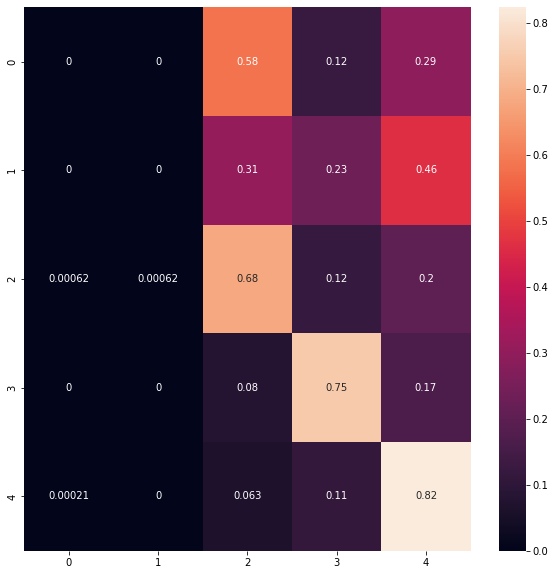

In [47]:
df_ADA= error_modelo(ADA,X_test,y_test)

In [48]:
df_ADA.columns=['ADA']
df_ADA

,ADA
accuracy,0.759864
f-1,0.759864
recall,0.759864
precision,0.759864


Accuracy 0.7624716553287982
F1 0.7624716553287982
Precision 0.7624716553287982
Recall 0.7624716553287982
------------------------------
ROC 0.804806952353613


,BAG
accuracy,0.762472
f-1,0.762472
recall,0.762472
precision,0.762472


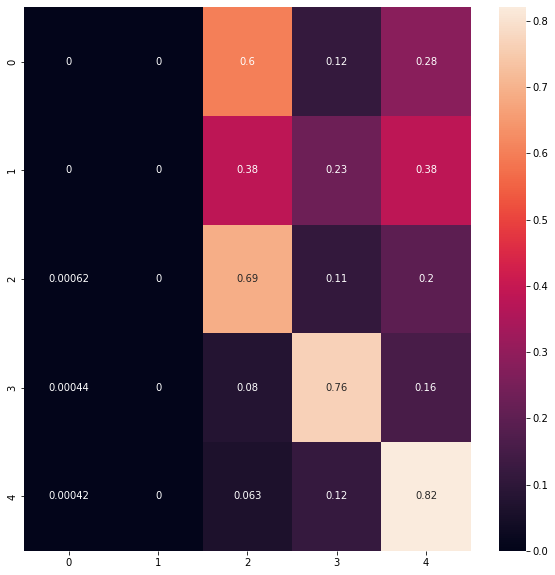

In [49]:
df_BAG = error_modelo(BAG,X_test,y_test)
df_BAG.columns=['BAG']
df_BAG

A partir de aqui tengo que cambiar las siguientes ordenes para cargar los modelos

F1 0.7605442176870748
Precision 0.7605442176870748
Recall 0.7605442176870748
------------------------------


(0.7605442176870748,
 0.7605442176870748,
            DecisionTreeClassifier(random_state=20)
 recall                                    0.760544
 precision                                 0.760544)

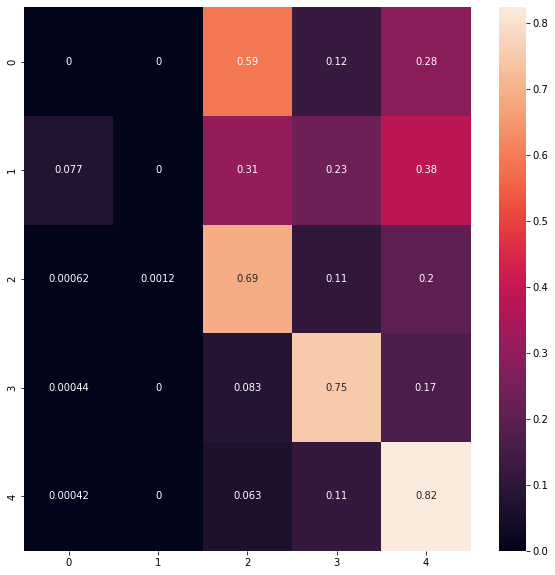

In [21]:
error_modelo(DTC,X_test,y_test)

F1 0.7605442176870748
Precision 0.7605442176870748
Recall 0.7605442176870748
------------------------------


(0.7605442176870748,
 0.7605442176870748,
            RandomForestClassifier(random_state=20)
 recall                                    0.760544
 precision                                 0.760544)

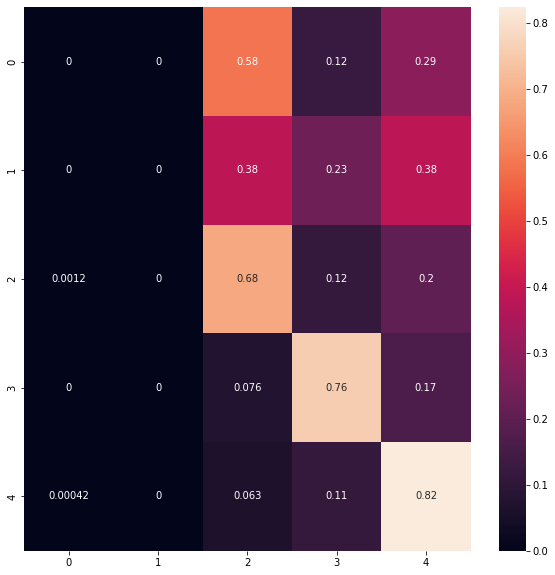

In [22]:
error_modelo(RND,X_test,y_test)

F1 0.7631519274376416
Precision 0.7631519274376417
Recall 0.7631519274376417
------------------------------


(0.7631519274376417,
 0.7631519274376417,
            GradientBoostingClassifier(random_state=20)
 recall                                        0.763152
 precision                                     0.763152)

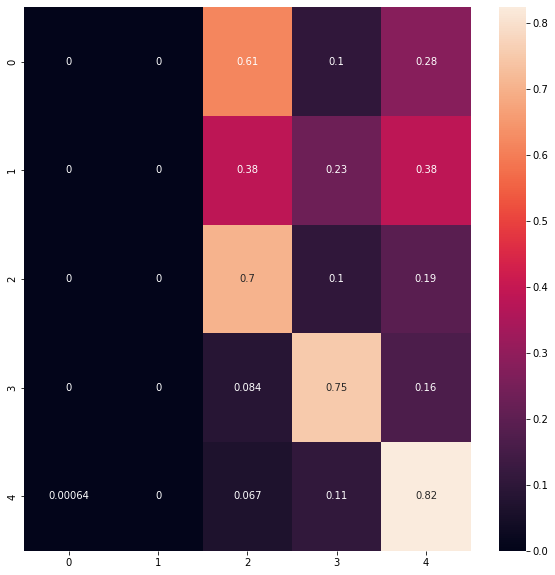

In [23]:
error_modelo(GBCT,X_test,y_test)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


F1 0.31700680272108844
Precision 0.31700680272108844
Recall 0.31700680272108844
------------------------------


(0.31700680272108844,
 0.31700680272108844,
            KNeighborsClassifier()
 recall                   0.317007
 precision                0.317007)

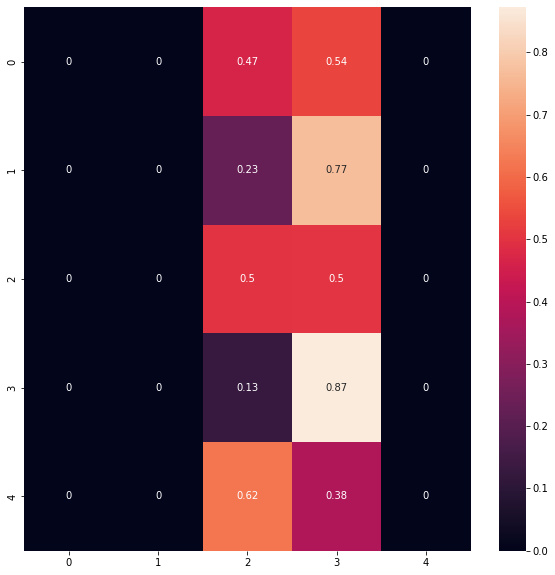

In [24]:
error_modelo(KNN,X_test,y_test)

F1 0.7052154195011338
Precision 0.7052154195011338
Recall 0.7052154195011338
------------------------------


(0.7052154195011338,
 0.7052154195011338,
            LogisticRegression(max_iter=10000)
 recall                               0.705215
 precision                            0.705215)

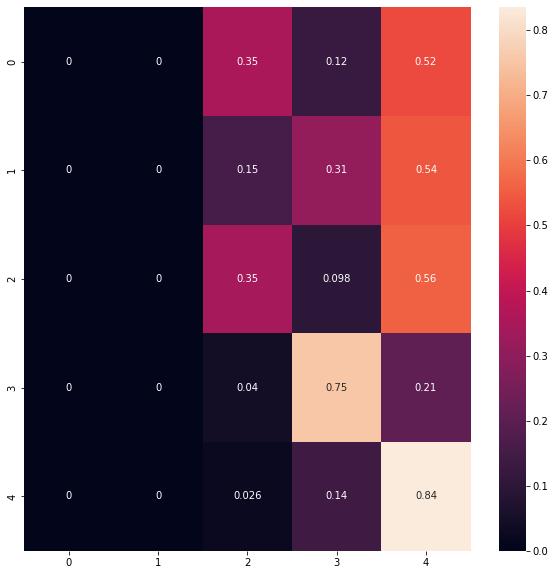

In [25]:
error_modelo(LOGREG,X_test,y_test)

Viendo estos datos desechamos los modelos de *REGRESION LOGÍSTICA* y de *K NEAREST NEIGHBORS*, ya que sus métricas están alejadas del resto.

In [50]:
df_errores=pd.DataFrame()

In [55]:
df_errores=pd.concat([df_ADA,df_BAG],axis=1)
df_errores

,ADA,BAG
accuracy,0.759864,0.762472
f-1,0.759864,0.762472
recall,0.759864,0.762472
precision,0.759864,0.762472


### 3. LOOKING FOR THE BEST MODEL

In [21]:
pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier())                #Aqui da igual que clasificador los que se utilizan son los que vienen después, pero hay que poner uno
])

ada_params = {
    'classifier': [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))],               # Clasificador  1
    'classifier__n_estimators': np.arange(0,200,50),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__algorithm': ['SAMME','SAMME.R']   
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],               # Clasificador  2
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__min_samples_split': np.arange(5,30,5)
}

DTC_params = {
    'classifier': [DecisionTreeClassifier()],                           # Clasificador  3
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__min_samples_split': np.arange(5,30,5)
}

bag_params = {
    'classifier': [BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))],                           # Clasificador  3
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__max_samples': np.arange(0,200,50),
    'classifier__n_estimators': np.arange(0,200,50)
}

GB_params = {
    'classifier': [GradientBoostingClassifier()],                           # Clasificador  3
    'classifier__criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__warm_start': [True, False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__min_samples_split': np.arange(5,30,5),
    'classifier__n_estimators': np.arange(0,200,50)
}

search_space = [
    ada_params,
    random_forest_params,
    DTC_params,
    bag_params,
    GB_params
]



In [22]:
my_model = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5,
                  scoring='f1_micro')

In [23]:
my_model.fit(X_train, y_train)
print(my_model.best_estimator_)
print(my_model.best_score_)
print(my_model.best_params_)

KeyboardInterrupt: 